# **Saudi Arabia Used Cars**

[Sumber data Saudi arabia used cars](https://drive.google.com/file/d/1Tr4YT5dmgwTrXLvIqZ4diBf5z8K6JjrR/view?usp=sharing)

# **Contents**

  1. Business Problem Understanding
  2. Data Understanding
  3. Data Preprocessing
  4. Modeling
  5. Conclusion
  6. Recommendation


# **Business Problem Understanding**

**Context**

Pasar mobil bekas di Arab Saudi adalah salah satu pasar otomotif terbesar di kawasan Timur Tengah. Permintaan mobil bekas terus meningkat karena harga mobil baru relatif tinggi dan masyarakat memiliki preferensi terhadap variasi merek global. Namun, harga mobil bekas sangat bervariasi tergantung pada merek, tipe, tahun produksi, jarak tempuh, ukuran mesin, transmisi, dan asal mobil.

Menurut laporan dari [IMARC Group](https://www.imarcgroup.com/saudi-arabia-used-car-market?)
, nilai pasar mobil bekas di Arab Saudi mencapai USD 9,60 miliar pada tahun 2024 dan diproyeksikan tumbuh hingga USD 16,80 miliar pada tahun 2033, dengan laju pertumbuhan tahunan sebesar 6,43% (CAGR). Angka ini menunjukkan besarnya peluang bisnis sekaligus tantangan dalam menentukan harga mobil bekas yang kompetitif di pasar.

Perbedaan harga ini membuat pembeli kesulitan menilai apakah harga wajar, dan penjual sulit menentukan harga kompetitif. Oleh karena itu, dibutuhkan pendekatan berbasis data untuk membantu prediksi harga yang lebih akurat.

**Problem Statement**

Pasar mobil bekas di Saudi Arabia berkembang pesat dengan variasi harga yang cukup tinggi. Salah satu tantangan utamanya adalah menentukan harga jual yang sesuai berdasarkan kondisi dan fitur mobil, agar penjual tetap kompetitif sekaligus menarik bagi pembeli. Tanpa acuan yang jelas, sering kali harga ditentukan hanya berdasarkan perkiraan subjektif, sehingga berisiko terlalu mahal atau terlalu murah.

**Goals**

Tujuan utama proyek ini adalah membangun model prediksi harga mobil bekas menggunakan regresi linear. Model ini diharapkan dapat membantu penjual maupun pembeli untuk mengetahui estimasi harga yang wajar berdasarkan variabel penting, seperti tahun produksi, merek, model, jarak tempuh, kapasitas mesin, hingga tipe transmisi. Dengan begitu, keputusan jual beli dapat lebih adil dan transparan.

**Analytical Approach**

Langkah awal yang dilakukan adalah menganalisis data mobil bekas di Saudi Arabia untuk menemukan pola dari fitur-fitur yang memengaruhi harga. Setelah itu, dibangun model regresi linear yang mampu memprediksi harga berdasarkan variabel-variabel tersebut. Model yang dihasilkan nantinya akan dievaluasi untuk memastikan akurasi dan relevansinya dalam konteks pasar lokal.

**Metric Evaluation**

Metrik evaluasi yang digunakan adalah RMSE, MAE, dan MAPE. Ketiga metrik ini memberikan gambaran seberapa besar kesalahan prediksi harga dibandingkan nilai sebenarnya. Semakin kecil nilainya, semakin akurat model dalam memperkirakan harga mobil bekas. Selain itu, nilai R-squared juga digunakan untuk menilai seberapa baik model merepresentasikan variasi harga dalam data, terutama karena model yang digunakan adalah regresi linear.

# **Data Understanding**



*   Dataset ini berisi 5624 data mobil bekas yang dikumpulkan dari syarah.com.
*   Setiap baris data merepresentasikan informasi mengenai mobil bekas.

**Attributes Information**

| Attribute | Data Type | Description |
| --- | --- | --- |
| **Type** | Object | Jenis mobil bekas. |
| **Region** | Object | Wilayah di mana mobil bekas ditawarkan untuk dijual. |
| **Make** | Object | Nama perusahaan pembuat mobil. |
| **Gear_Type** | Object | Jenis transmisi mobil bekas. |
| **Origin** | Object | Negara asal mobil bekas. |
| **Options** | Object | Opsi atau fitur tambahan pada mobil bekas. |
| **Year** | Integer | Tahun produksi. |
| **Engine_Size** | Float | Ukuran mesin mobil bekas. |
| **Mileage** | Integer | Jarak tempuh mobil bekas. |
| **Negotiable** | Boolean | Bernilai True jika harga adalah 0, yang berarti harga dapat dinegosiasikan. |
| **Price** | Integer | Harga mobil bekas. |
<br>


In [ ]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')



In [ ]:
#Load dataset
df = pd.read_csv('/content/drive/MyDrive/Caps 2/data_saudi_used_cars.csv')
df.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0


#### **Exploratory Data Analysis**

**Distribusion of Saudi Arabia used Cars**

Text(0.5, 1.0, 'Distribusi of Saudi Arabia used Cars')

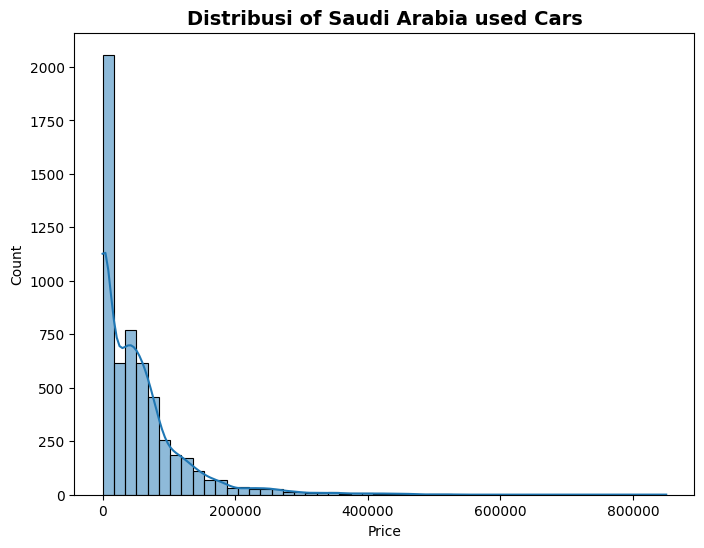

In [ ]:
#plot distribusi "price"
plt.figure(figsize=(8,6))
sns.histplot(df['Price'],kde=True, bins=50)
plt.title('Distribusi of Saudi Arabia used Cars', fontsize=14, weight='bold')


Distribusi harga mobil bekas di Saudi Arabia menunjukkan pola right-skewed, di mana mayoritas mobil memiliki harga relatif rendah hingga menengah, sedangkan hanya sebagian kecil mobil yang berada pada kategori harga sangat tinggi (mobil mewah/luxury).

**Types of Cars Related to Price**

In [ ]:
#Jumlah mobil berdasarkan brand
print("Jumlah mobil tiap brand:\n", df['Make'].value_counts())
print("\nJumlah mobil tiap jenis mobil:\n", df['Type'].value_counts())

Jumlah mobil tiap brand:
 Make
Toyota          1431
Hyundai          670
Ford             530
Chevrolet        458
Nissan           387
GMC              282
Kia              251
Mercedes         226
Lexus            222
Mazda            129
Honda            115
BMW               97
Dodge             95
Mitsubishi        94
Land Rover        79
Jeep              56
Chrysler          50
Audi              38
Changan           36
Renault           35
Cadillac          31
Genesis           31
Isuzu             25
Geely             24
Volkswagen        23
Porsche           22
MG                21
Lincoln           16
Suzuki            16
INFINITI          15
HAVAL             14
MINI              11
Other             10
Mercury            9
Daihatsu           9
Jaguar             9
Peugeot            8
Fiat               7
Hummer             5
Bentley            4
Great Wall         4
FAW                4
GAC                3
Rolls-Royce        3
Maserati           3
Zhengzhou          2
Fot

Brand mobil bekas yang paling banyak adalah Toyota

In [ ]:
#Grouping type mobil berdasarkan pabriknya
car_count = df.groupby(['Make', 'Type']).size().reset_index(name='Count')
display(car_count.head())

,Make,Type,Count
0,Aston Martin,DB9,1
1,Aston Martin,Vanquish,1
2,Audi,A3,4
3,Audi,A4,2
4,Audi,A5,2


Terdapat beberapa pabrikan mobil dengan type tertentu dan jumlah yang berbeda beda.

In [ ]:
#Median price tiap Brand
make_median = df.groupby('Make')['Price'].median().reset_index().sort_values(by='Price', ascending=False)
display(make_median.head())

,Make,Price
49,Rolls-Royce,500000.0
0,Aston Martin,290000.0
14,Ferrari,280000.0
4,Bentley,265000.0
33,Land Rover,176000.0


Harga median setiap brand mobil bekas di arab saudi

Options,Full,Semi Full,Standard
Make,,,
Aston Martin,290000.0,NaN,NaN
Audi,75000.0,70000.0,138000.0
BMW,75000.0,65000.0,138000.0
BYD,NaN,NaN,28000.0
Bentley,265000.0,NaN,NaN


Text(0.5, 1.0, 'Median Price of Car Options')

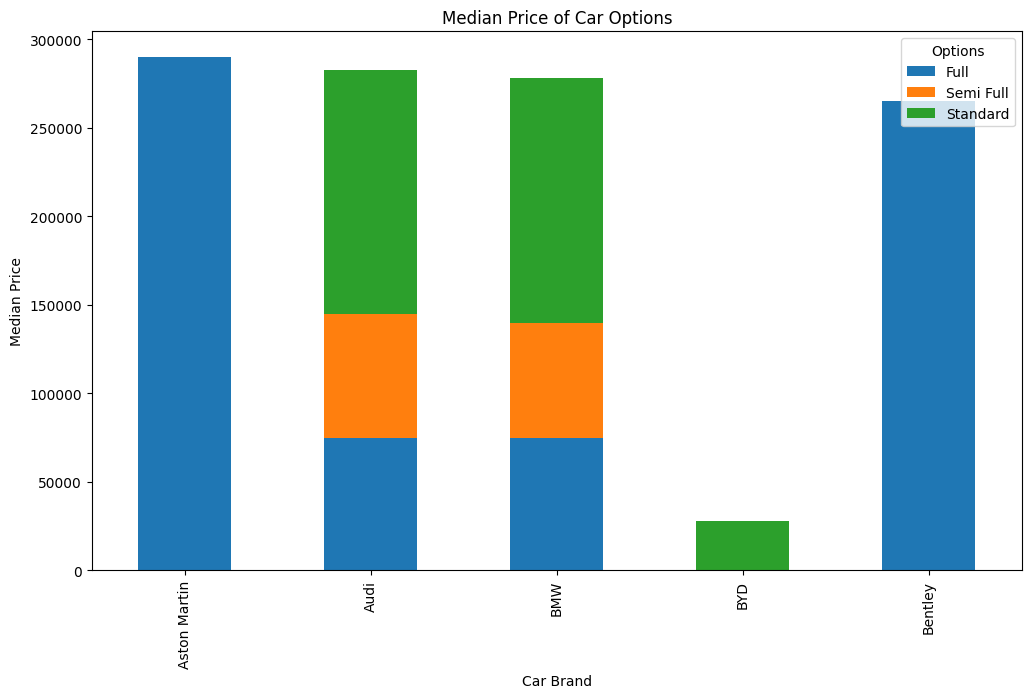

In [ ]:
# Plot harga median untuk tiap opsi mobil di setiap brand
from IPython.display import display

car_pivot = df.pivot_table(
    index='Make',
    columns='Options',
    values='Price',
    aggfunc='median'
)

display(car_pivot.head())

pivot_plot = car_pivot.head().plot.bar(
    stacked=True,
    figsize=(12, 7)
)

pivot_plot.set_xlabel('Car Brand')
pivot_plot.set_ylabel('Median Price')
pivot_plot.set_title('Median Price of Car Options')


Perbandingan harga median mobil berdasarkan merek dan tipe/opsi mobil bekas di Arab Saudi.Setiap brand mobil memiliki opsi yang berbeda beda,seperti Aston Martin,BYD,dan Bentley hanya memiliki satu opsi saja, sedangkan Audi dan BMW memiliki opsi yang lengkap/memiliki 3 opsi.Tentu saja beberapa opsi sangat mempengaruhi harga pada setiap mobil.

**Location**

,Region,Count
0,Riyadh,2272
1,Dammam,925
2,Jeddah,733
3,Qassim,225
4,Al-Medina,214


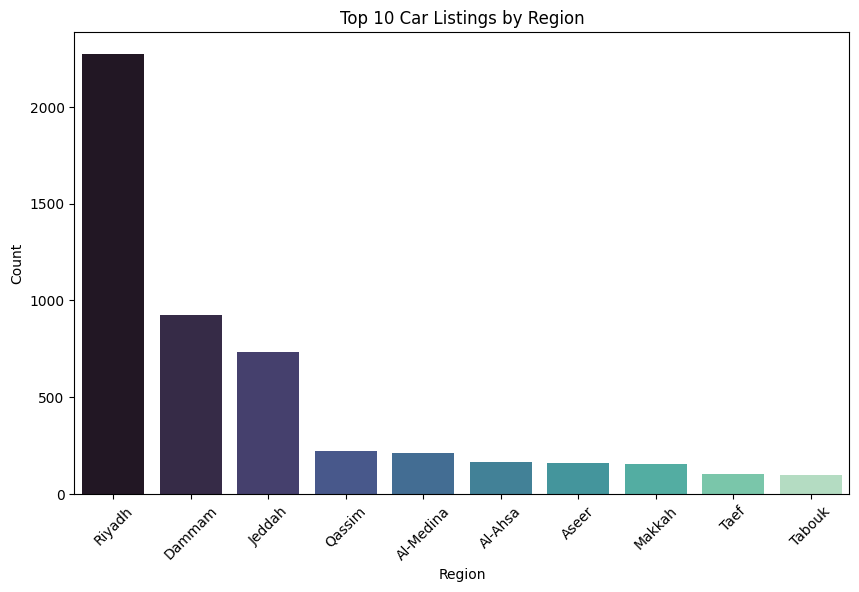

,Origin,Count
0,Saudi,4188
1,Gulf Arabic,697
2,Other,678
3,Unknown,61


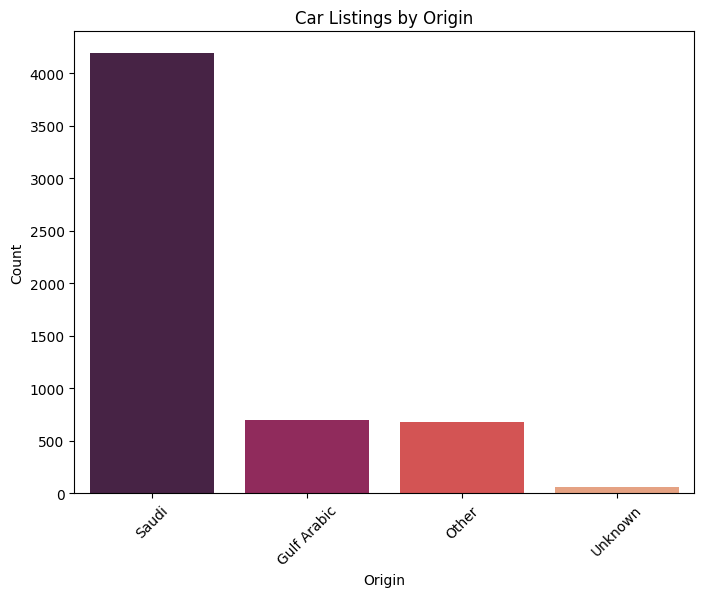

In [ ]:
from IPython.display import display

#Jumlah mobil berdasarkan Region
region_count = df['Region'].value_counts().reset_index()
region_count.columns = ['Region', 'Count']
display(region_count.head())

plt.figure(figsize=(10,6))
sns.barplot(data=region_count.head(10), x='Region', y='Count', palette='mako')
plt.title('Top 10 Car Listings by Region')
plt.xticks(rotation=45)
plt.show()

#Jumlah mobil berdasarkan Origin(asal mobil)
origin_count = df['Origin'].value_counts().reset_index()
origin_count.columns = ['Origin', 'Count']
display(origin_count.head())

plt.figure(figsize=(8,6))
sns.barplot(data=origin_count, x='Origin', y='Count', palette='rocket')
plt.title('Car Listings by Origin')
plt.xticks(rotation=45)
plt.show()



In [ ]:

#Cross-check Origin vs Region
origin_region = df.pivot_table(
    index='Region',
    columns='Origin',
    values='Price',
    aggfunc='median'
)
display(origin_region.head())

Origin,Gulf Arabic,Other,Saudi,Unknown
Region,,,,
Abha,0.0,0.0,14000.0,0.0
Al-Ahsa,29000.0,45000.0,38000.0,42500.0
Al-Baha,27500.0,0.0,15000.0,78000.0
Al-Jouf,0.0,22000.0,30000.0,0.0
Al-Medina,22500.0,6500.0,22250.0,12000.0


  Analisis distribusi lokasi menunjukkan bahwa sebagian besar mobil bekas yang dijual di Arab Saudi terkonsentrasi pada beberapa region utama. Hal ini menggambarkan bahwa pasar mobil bekas tidak tersebar merata, melainkan lebih dominan di wilayah tertentu yang kemungkinan memiliki populasi lebih besar atau daya beli yang lebih tinggi.

Dari sisi origin, mayoritas mobil yang tersedia berasal dari beberapa negara tertentu, seperti Jepang, Eropa, dan Amerika Serikat. Hal ini sejalan dengan tren impor mobil ke Arab Saudi yang memang didominasi oleh merek-merek besar dari luar negeri.

Ketika dibandingkan antara Region dan Origin, terlihat bahwa distribusi asal mobil cenderung bervariasi di tiap region. Beberapa region lebih banyak menawarkan mobil asal Jepang, sementara wilayah lain lebih banyak mobil Eropa atau Amerika. Pola ini bisa menjadi insight penting untuk memahami preferensi konsumen berdasarkan lokasi.

**Negotiable**

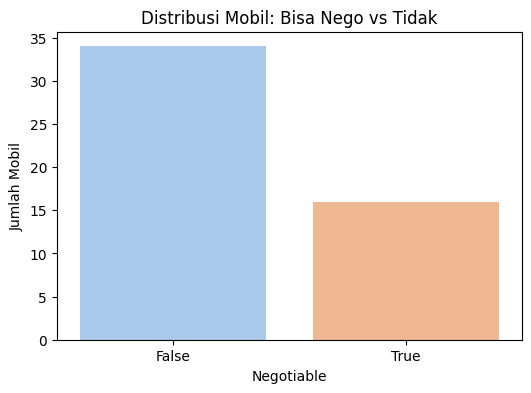

In [ ]:
#Distribusi mobil yang bisa dinego atau tidak
plt.figure(figsize=(6,4))
sns.countplot(x="Negotiable", data=df.head(50), palette="pastel")
plt.title("Distribusi Mobil: Bisa Nego vs Tidak")
plt.xlabel("Negotiable")
plt.ylabel("Jumlah Mobil")
plt.show()

Jadi grafik diatas menggambarkan jumlah mobil bekas yang harga bisa bisa di negosiasi atau tidak.

**Car Condition & Specs**

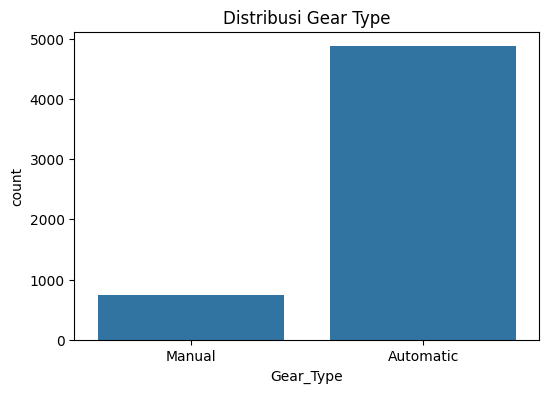

In [ ]:
#Distribusi Gear Type
plt.figure(figsize=(6,4))
sns.countplot(x="Gear_Type", data=df)
plt.title("Distribusi Gear Type")
plt.show()

Jenis jenis transmisi pada setiap mobil bekas dan yang paling banyak yaitu transmisi automatic

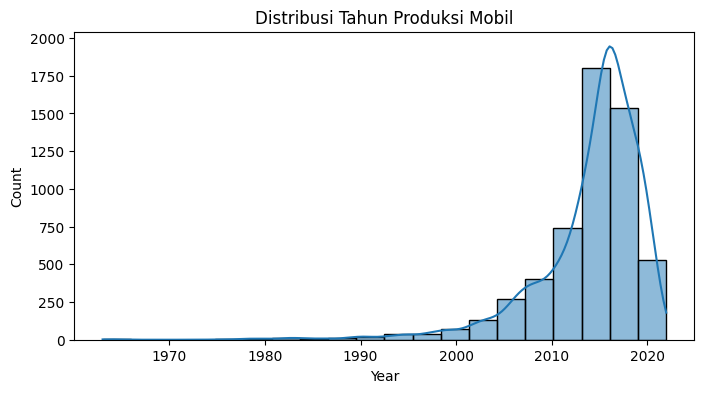

In [ ]:
#Distribusi Tahun Produksi
plt.figure(figsize=(8,4))
sns.histplot(df["Year"], bins=20, kde=True)
plt.title("Distribusi Tahun Produksi Mobil")
plt.show()

Dapat di lihat bahwa distribusi tahun prodksi mobil dari tahun ke tahun semakin meningkat

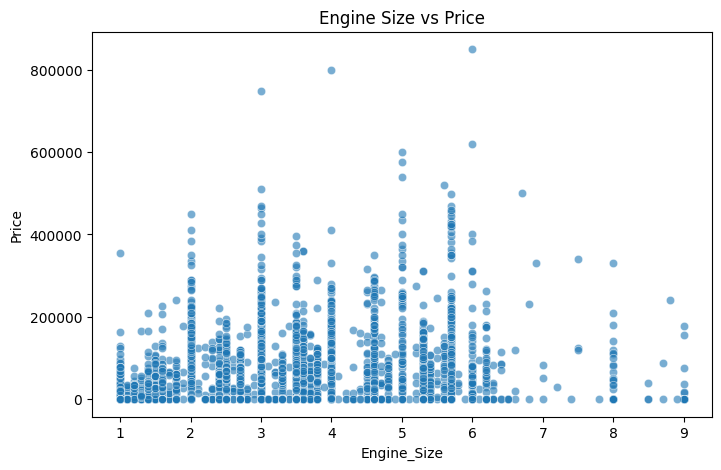

In [ ]:
#Hubungan Engine Size dengan Price
plt.figure(figsize=(8,5))
sns.scatterplot(x="Engine_Size", y="Price", data=df, alpha=0.6)
plt.title("Engine Size vs Price")
plt.show()

grafik diatas menjelaskan apakah mesin yang besar dapat mempengaruhi harga jual mobil itu sendiri

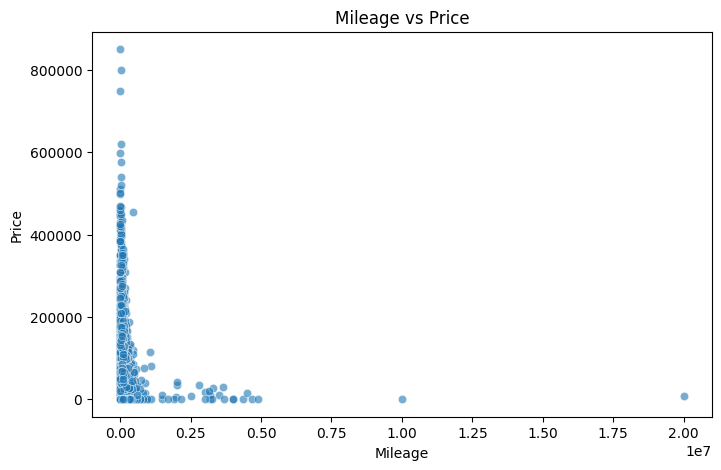

In [ ]:
#Hubungan Mileage dengan Price
plt.figure(figsize=(8,5))
sns.scatterplot(x="Mileage", y="Price", data=df, alpha=0.6)
plt.title("Mileage vs Price")
plt.show()

Dapat dilihat bahwa jarak tempuh mobil dapat mempengaruhi harga jual mobil, semakin jauh jarak tempuhnya  cenderung memiliki harga yang lebih rendah.

# **Data Prepocessing**

Pada tahap ini, kita akan melakukan cleaning pada data yang nantinya data yang sudah dibersihkan akan kita gunakan untuk proses analisis selanjutnya. Beberapa hal yang perlu dilakukan adalah:
- Drop fitur yang tidak memiliki relevansi terhadap permasalahan yang sedang dihadapi.
- Melakukan treatment terhadap missing value jika ada. Bisa dengan cara men-drop fiturnya jika memang tidak dibutuhkan atau bisa juga dengan mengimputasi dengan nilai yang paling masuk akal berdasarkan kasusnya.

In [ ]:
#Duplikasi DataFrame
df_model = df.copy()

In [ ]:
# Cek info lebih detail untuk setiap fitur
listItem = []

for col in df_model.columns:
    listItem.append([col, df_model[col].dtype, df_model[col].isna().sum(), round((df_model[col].isna().sum()/len(df_model[col]))*100, 2),
                    df_model[col].nunique(), list(df_model[col].drop_duplicates().sample(2).values)]);

df_model_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_model_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Type,object,0,0.0,347,"[Seltos, Vitara]"
1,Region,object,0,0.0,27,"[Khobar, Yanbu]"
2,Make,object,0,0.0,58,"[Foton, Kia]"
3,Gear_Type,object,0,0.0,2,"[Manual, Automatic]"
4,Origin,object,0,0.0,4,"[Unknown, Gulf Arabic]"
5,Options,object,0,0.0,3,"[Full, Semi Full]"
6,Year,int64,0,0.0,50,"[1999, 2006]"
7,Engine_Size,float64,0,0.0,71,"[5.1, 4.9]"
8,Mileage,int64,0,0.0,1716,"[10616, 2900]"
9,Negotiable,bool,0,0.0,2,"[True, False]"


Dari info dataset di atas, tidak ada data yang kosong pada fitur atau kolom.

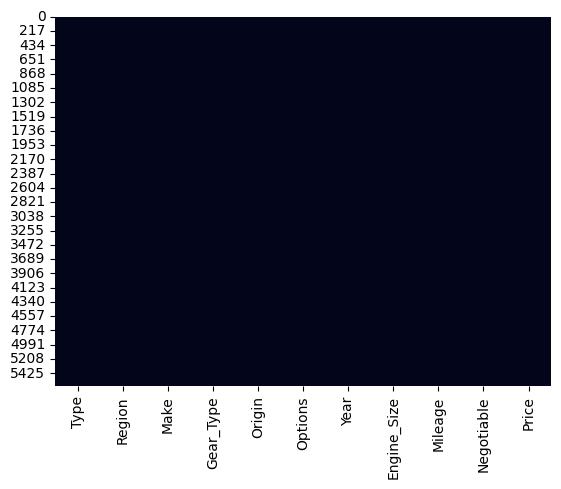

In [ ]:
# Missing value heatmap
sns.heatmap(df_model.isnull(), cbar=False);

Pada dataset ini tidak terdeteksi adanya missing value, oleh karena itu mungkin kita tidak akan drop fitur ini.

karena pada dataset ini tidak terdapat missing value,kita juga dapat mengetahui bahwa ada data yang duplikat pada dataset. Untuk memastikannya, kita bisa cek dengan menggunakan function duplicated()

In [ ]:
# Cek data duplikat
df_model.duplicated().sum()

np.int64(4)

Terdapat 4 baris data yang duplikat,hal ini bisa diatasi dengan cara drop duplikat.

In [ ]:
# Menghilangkan duplikat
df_model = df_model.drop_duplicates()

In [ ]:
# Cek info dataset
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5620 entries, 0 to 5623
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         5620 non-null   object 
 1   Region       5620 non-null   object 
 2   Make         5620 non-null   object 
 3   Gear_Type    5620 non-null   object 
 4   Origin       5620 non-null   object 
 5   Options      5620 non-null   object 
 6   Year         5620 non-null   int64  
 7   Engine_Size  5620 non-null   float64
 8   Mileage      5620 non-null   int64  
 9   Negotiable   5620 non-null   bool   
 10  Price        5620 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 488.5+ KB


index entries tadinya 5624 menjadi 5620, 4 baris duplikat sudah dihapus.

**Cek Dataset**

In [ ]:
#cek nilai missing value
df_model.isnull().sum()

,0
Type,0
Region,0
Make,0
Gear_Type,0
Origin,0
Options,0
Year,0
Engine_Size,0
Mileage,0
Negotiable,0


di dataset ini memang tidak terdapat adanya missing value, namun di dataset ini terdapat duplikat data.

In [ ]:
#Cek jarak tempuh mobil
df_model[['Price', 'Mileage', 'Engine_Size']].describe()

,Price,Mileage,Engine_Size
count,5620.000000,5.620000e+03,5620.000000
mean,53086.404448,1.509222e+05,3.296299
std,70175.153207,3.829633e+05,1.515253
min,0.000000,1.000000e+02,1.000000
25%,0.000000,3.800000e+04,2.000000
50%,36500.000000,1.030000e+05,3.000000
75%,73000.000000,1.960000e+05,4.500000
max,850000.000000,2.000000e+07,9.000000


In [ ]:
#cek typo
print(df_model['Gear_Type'].unique())
print(df_model['Region'].unique())


['Manual' 'Automatic']
['Abha' 'Riyadh' 'Hafar Al-Batin' 'Aseer' 'Makkah' 'Dammam' 'Yanbu'
 'Al-Baha' 'Jeddah' 'Hail' 'Khobar' 'Al-Ahsa' 'Jazan' 'Al-Medina'
 'Al-Namas' 'Tabouk' 'Taef' 'Qassim' 'Arar' 'Jubail' 'Sabya' 'Al-Jouf'
 'Najran' 'Wadi Dawasir' 'Qurayyat' 'Sakaka' 'Besha']


In [ ]:
#cek tahun distribusi
df_model['Year'].min(), df_model['Year'].max()


(1963, 2022)

Terdapat kejanggalan pada mileage yaitu nilai maksimalnya menyentuh 20 juta km.Hal ini sangat tidak mungkin terjadi pada mobil seri apa pun.

Pada dataset ini juga terdapat tahun mobil yang terlalu tua (1963) dan tidak relevan dengan tahun sekarang.Oleh karena itu kita akan melakukan filtering dari tahun 1990 sampai 2022.

In [ ]:
# Cek jumlah data mileage > 500.000
df_model[df_model['Mileage'] > 500000]['Mileage'].count()


np.int64(95)

In [ ]:
# Drop data mileage > 500.000
df_model = df_model[df_model['Mileage'] <= 500000]

# Cek statistik setelah filter
df_model['Mileage'].describe()


,Mileage
count,5525.000000
mean,125886.203077
std,110216.544035
min,100.000000
25%,36500.000000
50%,100000.000000
75%,190000.000000
max,500000.000000


Kita drop data yang > 500 ribu km, oke setelah ini kita lanjut filtering Years

In [ ]:
# Cek range tahun mobil
df_model['Year'].min(), df_model['Year'].max()


(1963, 2022)

In [ ]:
# Drop mobil dengan tahun < 1990
df_model = df_model[df_model['Year'] >= 1990]

# Cek distribusi tahun setelah filter
df_model['Year'].value_counts().sort_index()


,count
Year,
1990,8
1991,7
1992,2
1993,10
1994,6
1995,15
1996,4
1997,15
1998,10


Kita drop data mobil yang year nya kurang dari tahun 1990

In [ ]:
# Cek jumlah data dengan price = 0
df_model[df_model['Price'] == 0]['Price'].count()


np.int64(1722)

In [ ]:
# Drop data price = 0
df_model= df_model[df_model['Price'] > 0]

In [ ]:
df_model = df_model[df_model['Price'] > 1]

In [ ]:
# Cek statistik harga setelah filter
df_model['Price'].describe()

,Price
count,3765.000000
mean,78726.637981
std,72982.738555
min,500.000000
25%,35500.000000
50%,58000.000000
75%,95000.000000
max,850000.000000


Price = 0 sudah di drop

In [ ]:
# Cek kembali dataset info
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3765 entries, 1 to 5622
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         3765 non-null   object 
 1   Region       3765 non-null   object 
 2   Make         3765 non-null   object 
 3   Gear_Type    3765 non-null   object 
 4   Origin       3765 non-null   object 
 5   Options      3765 non-null   object 
 6   Year         3765 non-null   int64  
 7   Engine_Size  3765 non-null   float64
 8   Mileage      3765 non-null   int64  
 9   Negotiable   3765 non-null   bool   
 10  Price        3765 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 327.2+ KB


**Data Correlation**

In [ ]:
#ambil fitur numerik
num_cols = ['Year', 'Mileage', 'Engine_Size', 'Price']
corr = df_model[num_cols].corr(method='pearson')


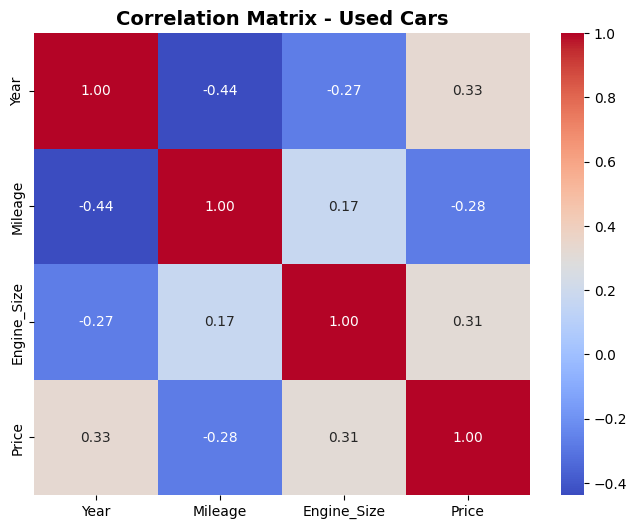

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix - Used Cars", fontsize=14, weight='bold')
plt.show()


Year dan Price memiliki korelasi positif, mobil yang lebih baru cenderung memiliki harga lebih tinggi.

Untuk Mileage memiliki korelasi negatif, semakin tinggi jarak tempuh mobil, semakin rendah harga jualnya.

Engine Size dan Price memiliki korelasi positif, mobil dengan mesin lebih besar umumnya memiliki harga lebih mahal.
Hubungan antar variabel selain dengan Price relatif lebih lemah, sehingga mungkin tidak terlalu signifikan untuk dimasukkan langsung sebagai prediktor.

**Outliers Detection**

Banyaknya outliers pada data tentu akan memengaruhi hasil analisis dan pemodelan yang dilakukan. Ada beberapa hal yang harus dipertimbangkan sebelum memutuskan treatment yang sesuai dengan data, di antaranya adalah dengan mempertimbangkan sisi domain knowledge.

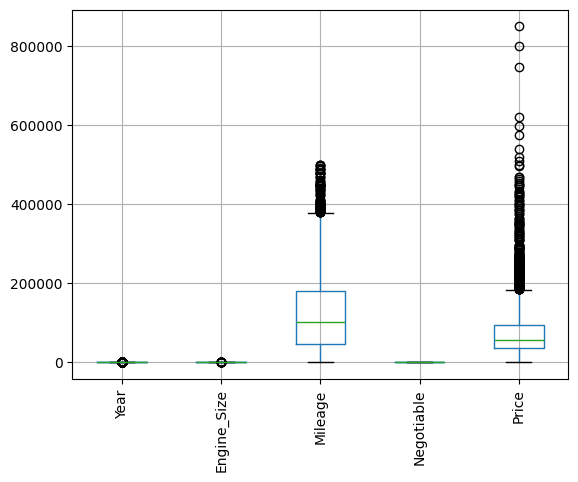

In [ ]:
# Plot boxplot untuk mengecek outliers
df_model.boxplot(rot=90);

Terlihat banyak sekali outliers pada beberapa fitur. Dalam project ini, untuk membuat dataset yang lebih bersih dari outliers, saya akan melakukan beberapa rekayasa data pada fitur-fitur dengan mempertimbangkan kombinasi antara hasil dari metode IQR dan juga domain knowledge. Nantinya, model yang dihasilkan hanya terbatas dapat memprediksi listing baru yang nilai-nilainya pada rentang data berdasarkan 'clean dataset' ini saja. Di luar rentang data, hasil prediksi dari model akan menjadi bias.

In [ ]:
# Fungsi untuk mendeteksi outliers dengan IQR
def find_anomalies(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = 1.5 * iqr

    limit_bawah = q1 - limit
    limit_atas = q3 + limit

    print(f"IQR: {iqr}")
    print(f"limit_bawah: {limit_bawah}")
    print(f"limit_atas: {limit_atas}")
    return limit_bawah, limit_atas

In [ ]:
# Cek outliers pada Price
print("Outliers pada Price:")
find_anomalies(df_model['Price'])

Outliers pada Price:
IQR: 59500.0
limit_bawah: -53750.0
limit_atas: 184250.0


(np.float64(-53750.0), np.float64(184250.0))

In [ ]:

# Cek outliers pada Mileage
print("\nOutliers pada Mileage:")
find_anomalies(df_model['Mileage'])


Outliers pada Mileage:
IQR: 132000.0
limit_bawah: -150000.0
limit_atas: 378000.0


(np.float64(-150000.0), np.float64(378000.0))

In [ ]:
# Cek outliers pada Year
print("\nOutliers pada Year:")
find_anomalies(df_model['Year'])


Outliers pada Year:
IQR: 4.0
limit_bawah: 2008.0
limit_atas: 2024.0


(np.float64(2008.0), np.float64(2024.0))

In [ ]:
# Cek outliers pada Engine_Size
print("\nOutliers pada Engine Size:")
find_anomalies(df_model['Engine_Size'])


Outliers pada Engine Size:
IQR: 2.0
limit_bawah: -1.0
limit_atas: 7.0


(np.float64(-1.0), np.float64(7.0))

Selanjutnya, kita dapat memulai feature engineering terhadap fitur-fitur numerikal.

**Price**

In [ ]:
# Cek deskriptif statistik kolom price
df_model['Price'].describe()

,Price
count,3765.000000
mean,78726.637981
std,72982.738555
min,500.000000
25%,35500.000000
50%,58000.000000
75%,95000.000000
max,850000.000000


In [ ]:
# Cek price > $183750.0
df_model[df_model['Price'] > 183750.0].count()['Price']

np.int64(258)

Dari hasil analisis distribusi Price, ditemukan nilai ekstrim yang bisa mengganggu model,
Untuk menangani outlier, dilakukan filtering dengan batas harga ≤ 183,750.0,
Setelah difilter, jumlah data yang tersisa adalah 258 entri.

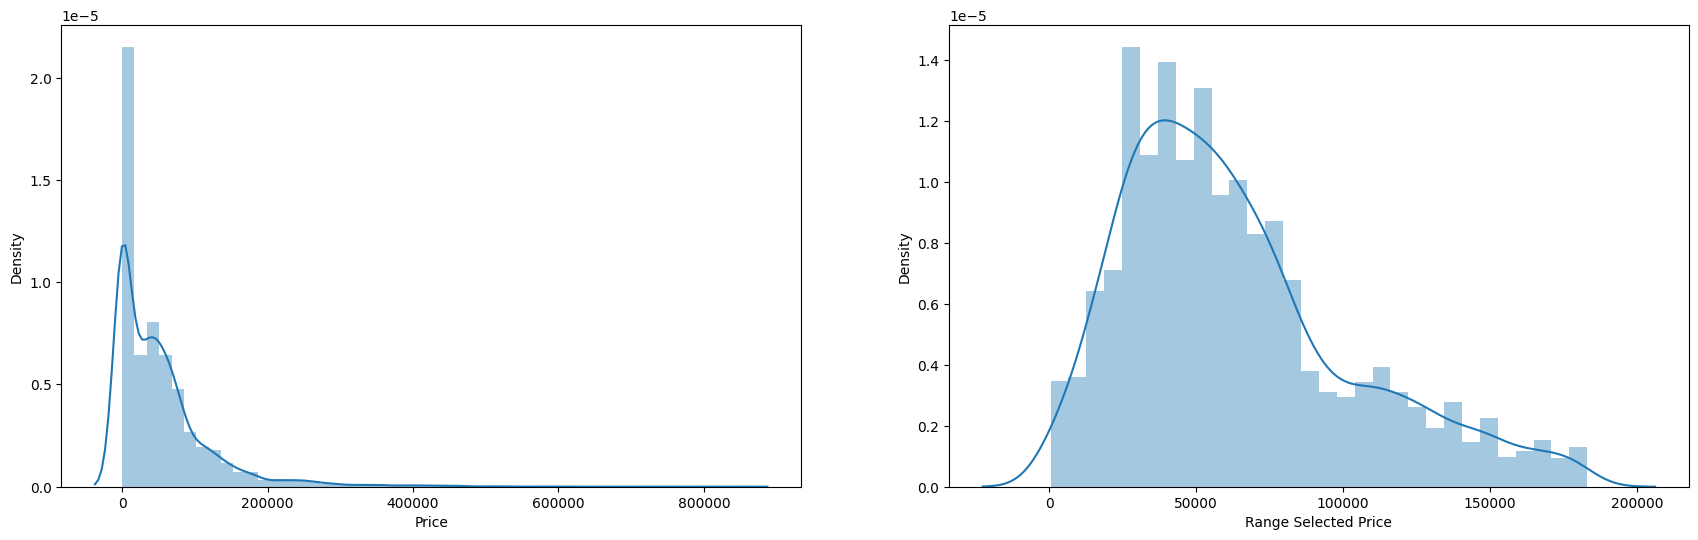

In [ ]:
# Melakukan filtering pada data
df_model = df_model[(df_model['Price'] <= 183750.0)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['Price'], ax=axes[0])
sns.distplot(df_model['Price'], ax=axes[1])
axes[0].set_xlabel('Price')
axes[1].set_xlabel('Range Selected Price');

In [ ]:
# Cek deskriptif statistik kolom 'price' setelah filtering
df_model['Price'].describe()

,Price
count,3507.000000
mean,63486.282293
std,39416.802510
min,500.000000
25%,35000.000000
50%,55000.000000
75%,82250.000000
max,183000.000000


**Mileage**

Mencari mobil bekas yang Mileagenya kurang dari 300.000 km

In [ ]:
# Cek deskriptif statistik kolom mileage
df_model['Mileage'].describe()

,Mileage
count,3507.000000
mean,129176.615626
std,103094.517801
min,100.000000
25%,53073.000000
50%,106377.000000
75%,187000.000000
max,500000.000000


In [ ]:
# Cek jumlah nilai Mileage > 300000
df_model[df_model['Mileage'] > 300000].count()['Mileage']

np.int64(257)

In [ ]:
# Memilih data dengan nilai Mileage tidak lebih dari 300000
df_model = df_model[(df_model['Mileage'] <= 300000)]

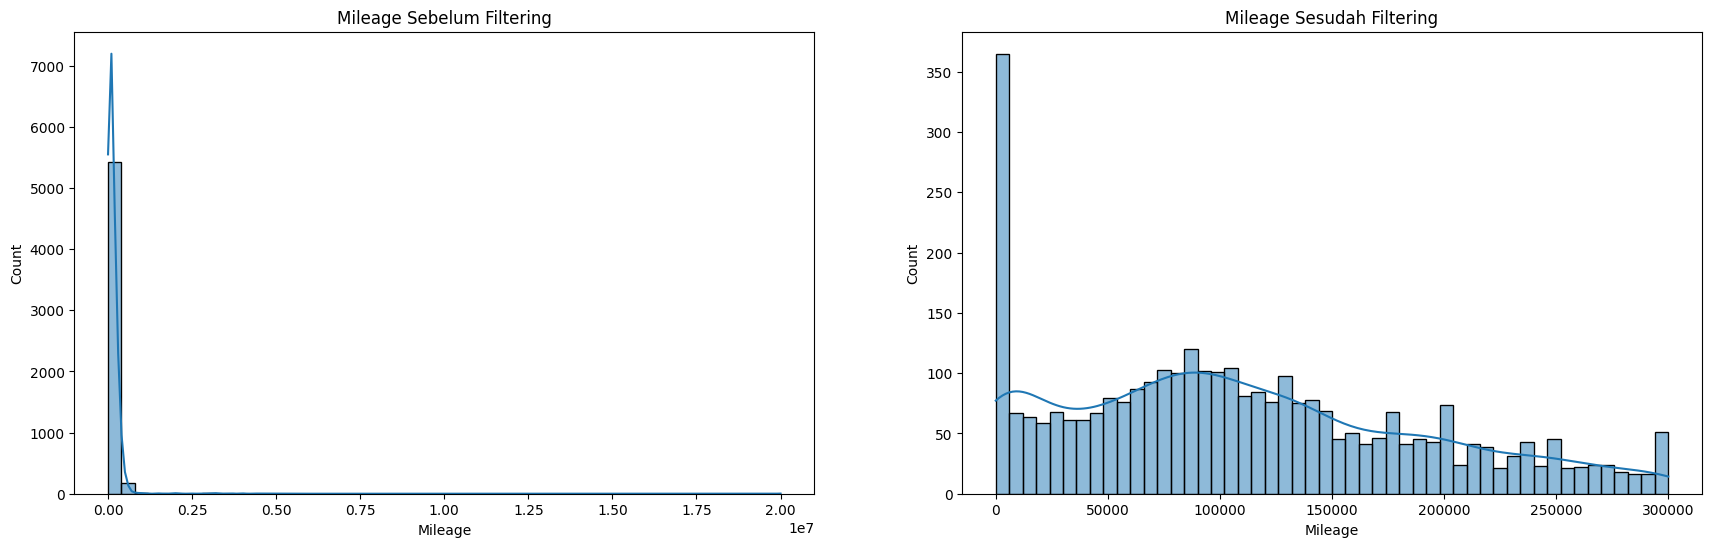

In [ ]:
# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1, 2, figsize=(21, 6))
sns.histplot(df['Mileage'], ax=axes[0], bins=50, kde=True)
axes[0].set_title('Mileage Sebelum Filtering')

sns.histplot(df_model['Mileage'], ax=axes[1], bins=50, kde=True)
axes[1].set_title('Mileage Sesudah Filtering')
plt.show()

**Engine Size**

In [ ]:
df_model['Engine_Size'].describe()

,Engine_Size
count,3250.000000
mean,3.056215
std,1.424693
min,1.000000
25%,2.000000
50%,2.700000
75%,3.800000
max,9.000000


In [ ]:
# Cek jumlah mobil yang memiliki ukuran mesin lebih dari 7 Liter
len(df_model[df_model['Engine_Size'] > 7])

24

Untuk fitur ini saya akan mengambil mobil yang memiliki ukuran mesin lebih dari 7 liter yang dimana sudah dikelompokkan dalam kategori supercar atau truk khusus.

In [ ]:
# Menerapkan limitasi data berdasar kolom 'Engine Size'
df_model = df_model[(df_model['Engine_Size'] <= 7)]

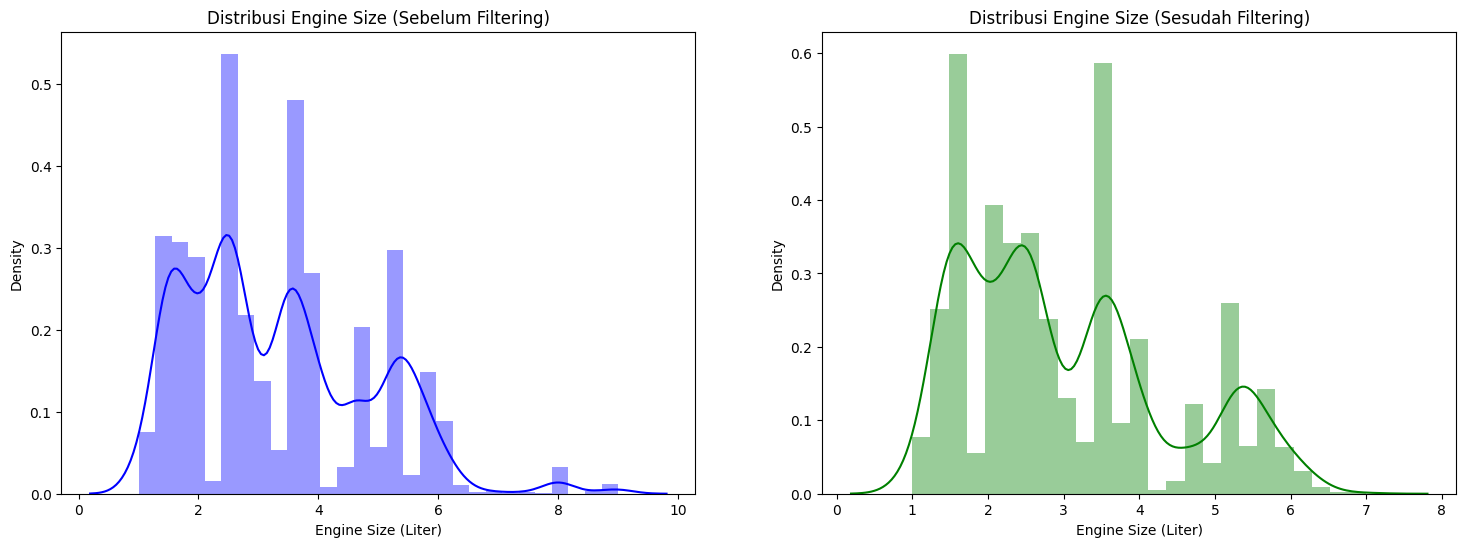

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.distplot(df['Engine_Size'], ax=axes[0], color='blue')
axes[0].set_title('Distribusi Engine Size (Sebelum Filtering)')
axes[0].set_xlabel('Engine Size (Liter)')

sns.distplot(df_model['Engine_Size'], ax=axes[1], color='green')
axes[1].set_title('Distribusi Engine Size (Sesudah Filtering)')
axes[1].set_xlabel('Engine Size (Liter)')
plt.show()

**Year**

In [ ]:
df_model['Year'].describe()

,Year
count,3226.000000
mean,2015.296652
std,4.260185
min,1990.000000
25%,2014.000000
50%,2016.000000
75%,2018.000000
max,2021.000000


In [ ]:
# Cek jumlah mobil dengan tahun produksi < 1990
df_model[df_model['Year'] < 1990].count()['Year']

np.int64(0)

In [ ]:
# Filtering: hanya ambil mobil dengan tahun >= 1990
df_model = df_model[df_model['Year'] >= 1990]

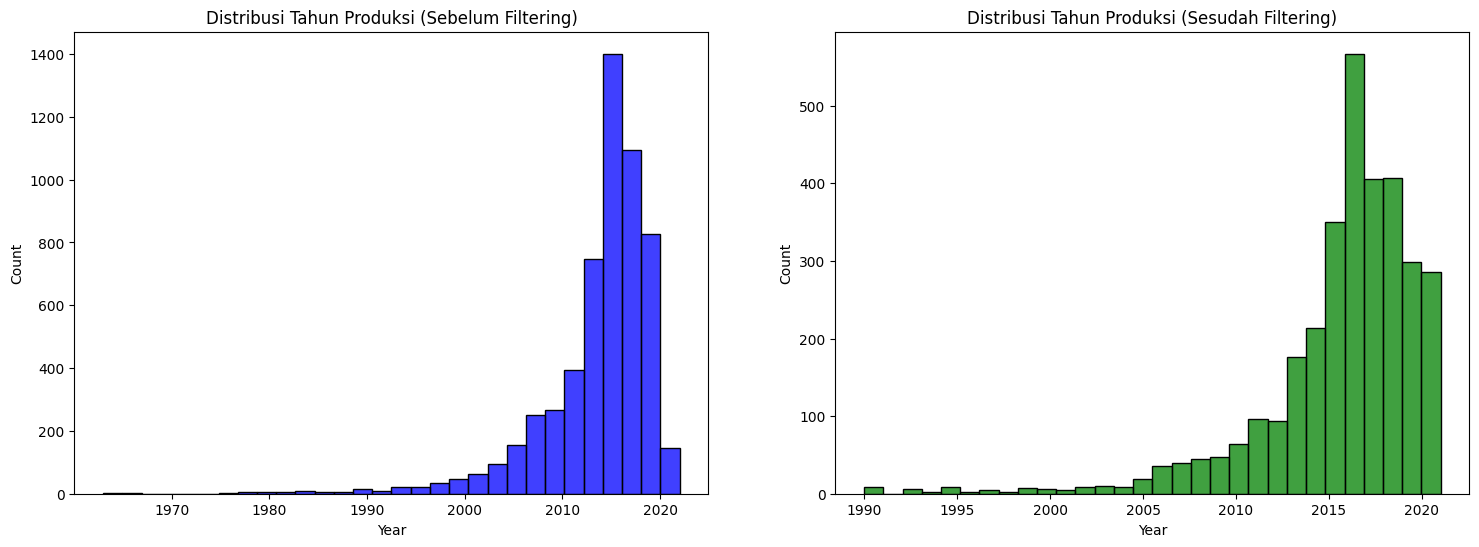

In [ ]:
# Plot distribusi sebelum dan sesudah filtering
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.histplot(df['Year'], ax=axes[0], bins=30, color='blue')
axes[0].set_title('Distribusi Tahun Produksi (Sebelum Filtering)')
axes[0].set_xlabel('Year')

sns.histplot(df_model['Year'], ax=axes[1], bins=30, color='green')
axes[1].set_title('Distribusi Tahun Produksi (Sesudah Filtering)')
axes[1].set_xlabel('Year')

plt.show()

Data yang terbaru dimulai pada tahun 1990 - 2021

In [ ]:
# bikin flag baru: is_negotiable
df['is_negotiable'] = df['Price'].apply(lambda x: 1 if x == 0 else 0)

# cek hasil
print(df[['Price', 'Negotiable', 'is_negotiable']].head(10))

    Price  Negotiable  is_negotiable
0       0        True              1
1  120000       False              0
2  260000       False              0
3   42000       False              0
4       0        True              1
5   58000       False              0
6   85000       False              0
7   48000       False              0
8   81500       False              0
9       0        True              1


Untuk membuat fitur pada kolom negotiable, oleh karena itu lebih baik ditandai yang memiliki price=0 / negotiable

**Clean Dataset**

In [ ]:
# Cek dataset yang sudah bersih
df_model.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
5,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,False,58000
6,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,False,85000
7,Sonata,Riyadh,Hyundai,Automatic,Saudi,Full,2016,2.4,155,False,48000
8,Avalon,Riyadh,Toyota,Automatic,Saudi,Standard,2016,3.5,110864,False,81500


In [ ]:
# Cek kembali info dataset
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3226 entries, 3 to 5622
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         3226 non-null   object 
 1   Region       3226 non-null   object 
 2   Make         3226 non-null   object 
 3   Gear_Type    3226 non-null   object 
 4   Origin       3226 non-null   object 
 5   Options      3226 non-null   object 
 6   Year         3226 non-null   int64  
 7   Engine_Size  3226 non-null   float64
 8   Mileage      3226 non-null   int64  
 9   Negotiable   3226 non-null   bool   
 10  Price        3226 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 280.4+ KB


kita sudah berhasil menghapus duplikat dari 5624 menjadi 5620, dan kemudian menjadi 3226 setelah cleaning lebih lanjut.

Kita juga berhasil menangani outlier ekstrem pada fitur Mileage (20 juta km) yang sangat penting untuk model harga.

In [ ]:
df_model['Negotiable'] = df_model['Negotiable'].astype(int)

In [ ]:
# Cek dulu nama kolom biar yakin ga typo
print("Kolom dataset:", df_model.columns.tolist())

Kolom dataset: ['Type', 'Region', 'Make', 'Gear_Type', 'Origin', 'Options', 'Year', 'Engine_Size', 'Mileage', 'Negotiable', 'Price']


# **Modeling**

In [ ]:
!pip install category_encoders

In [ ]:
!pip install xgboost

In [ ]:
# Import library untuk modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

**Encoding**

Supaya bisa menggunakan semua fitur yang dipilih , maka fitur kategorikal harus diganti menjadi numerikal.Disini kita menggunakan ColumnTransformer.

In [ ]:
transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first', handle_unknown='ignore'),
     make_column_selector(dtype_include=object)),  # otomatis ambil semua kolom object
    ('Binary', ce.BinaryEncoder(), ['Negotiable'])
], remainder='passthrough')

In [ ]:
df_model['Negotiable'] = df_model['Negotiable'].astype(int)

**Data Splitting**

In [ ]:
# Memisahkan data independen variabel dengan target
X = df_model.drop('Price', axis=1)
y = df_model['Price']

**Train and Test Splitting**

In [400]:
# Splitting data training dan test dengan proporsi 70:30
# Reset index to avoid issues with ColumnTransformer later
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
print(df_model.dtypes)

Type            object
Region          object
Make            object
Gear_Type       object
Origin          object
Options         object
Year             int64
Engine_Size    float64
Mileage          int64
Negotiable       int64
Price            int64
dtype: object


In [ ]:
x_train = pd.DataFrame(x_train, columns=X.columns)
x_test = pd.DataFrame(x_test, columns=X.columns)

In [ ]:
from sklearn.compose import make_column_selector

categorical_cols = ['Type', 'Region', 'Make', 'Gear_Type', 'Origin', 'Options']

transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols),
    ('Binary', ce.BinaryEncoder(), ['Negotiable'])
], remainder='passthrough')

**Choose a Benchmark Model**

In [391]:
import warnings
warnings.filterwarnings("ignore", message="No categorical columns found")

In [392]:

lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)

models = [
    TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp),
    TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp),
    TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp),
    TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp),
    TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)
]

model_names = ['Linear Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost']

# === Cross Validation Setup ===
crossval = KFold(n_splits=5, shuffle=True, random_state=42)
scaler = StandardScaler(with_mean=False)

# === Evaluasi Model per fold ===
for name, model in zip(model_names, models):
    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', model)
    ])

    # Hasil per fold (RMSE)
    model_cv_rmse = cross_val_score(
        estimator, x_train, y_train,
        cv=crossval,
        scoring='neg_root_mean_squared_error',
        error_score='raise'
    )

    # Print array tiap fold + nama model
    print(model_cv_rmse, model)

[-25410.73444697 -21897.71832129 -47860.41200886 -24585.2281458
 -21011.11544178] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-32532.29744589 -31581.52870085 -29805.91533651 -31121.34552531
 -30190.37492884] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-30401.40270346 -26656.70680908 -27710.09806461 -28844.49948363
 -25387.49213673] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=DecisionTreeRegressor(random_state=42))
[-26718.14520536 -22192.09830219 -23530.85089039 -23257.98663848
 -21053.41532219] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=RandomForestRegressor(random_state=42))
[-25370.36132812 -21076.66796875 -22781.37695312 -22093.5859375
 -20883.95898438] TransformedTarge

In [393]:
# === Summarize results ===
results = {}

for name, model in zip(model_names, models):
    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', model)
    ])

    model_cv_rmse = cross_val_score(
        estimator, x_train, y_train,
        cv=crossval,
        scoring='neg_root_mean_squared_error',
        error_score='raise'
    )

    # Convert negative RMSE to positive
    results[name] = {'RMSE': -model_cv_rmse.mean()}

results_df = pd.DataFrame(results).T
display(results_df.sort_values(by='RMSE'))

,RMSE
XGBoost,22441.190234
Random Forest,23350.499272
Decision Tree,27800.039840
Linear Regression,28153.041673
KNN,31046.292387


In [395]:
# Calculate mean and standard deviation for each metric
nilai_mean_rmse = [-results[name]['RMSE'] for name in model_names] # RMSE is negative in cross_val_score
# Need to recalculate cross_val_score to get std dev for all metrics
rmse_scores = {}
mae_scores = {}
mape_scores = {}

for name, model in zip(model_names, models):
    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', model)
    ])

    rmse_scores[name] = cross_val_score(
        estimator, x_train, y_train,
        cv=crossval,
        scoring='neg_root_mean_squared_error',
        error_score='raise'
    )
    mae_scores[name] = cross_val_score(
        estimator, x_train, y_train,
        cv=crossval,
        scoring='neg_mean_absolute_error',
        error_score='raise'
    )
    mape_scores[name] = cross_val_score(
        estimator, x_train, y_train,
        cv=crossval,
        scoring='neg_mean_absolute_percentage_error',
        error_score='raise'
    )

nilai_mean_rmse = [-rmse_scores[name].mean() for name in model_names]
nilai_std_rmse = [rmse_scores[name].std() for name in model_names]
nilai_mean_mae = [-mae_scores[name].mean() for name in model_names]
nilai_std_mae = [mae_scores[name].std() for name in model_names]
nilai_mean_mape = [-mape_scores[name].mean() for name in model_names]
nilai_std_mape = [mape_scores[name].std() for name in model_names]


# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': model_names,
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,28153.041673,9987.654063,15232.421492,1135.007865,0.909523,0.157645
1,KNN,31046.292387,976.877868,21207.187092,490.609482,0.996061,0.147683
2,Decision Tree,27800.039840,1731.685367,16985.474453,980.289873,1.075595,0.222207
3,Random Forest,23350.499272,1897.398846,14168.817178,1157.525294,0.860469,0.155157
4,XGBoost,22441.190234,1618.856956,13642.043945,904.005653,0.804334,0.152987


Model XGBoost tampil sebagai juara dengan metrik Mean Absolute Percentage Error (Mean_MAPE) terendah, yaitu 0.8043 (atau sekitar 80.43% error) dan memiliki Mean_RMSE terendah (22441). Sementara itu, Random Forest menyusul ketat dengan Mean_MAPE 0.8605. Hasil ini mengindikasikan bahwa model ensemble yang kompleks (Random Forest dan XGBoost) jauh lebih unggul dalam memprediksi harga mobil dibandingkan model sederhana seperti Linear Regression dan Decision Tree yang menghasilkan MAPE lebih tinggi. Meskipun demikian, nilai MAPE rata-rata yang masih tinggi menunjukkan bahwa ada ruang besar untuk peningkatan akurasi lebih lanjut melalui hyperparameter tuning dan feature engineering.

In [402]:
# Benchmark 2 model terbaik
models = {
    'XGB': XGBRegressor(random_state=1),
    'RandomForest': RandomForestRegressor(random_state=1)
}

score_rmse = []
score_mae = []
score_mape = []

# Convert 'Negotiable' column to integer type after splitting
x_train['Negotiable'] = x_train['Negotiable'].astype(int)
x_test['Negotiable'] = x_test['Negotiable'].astype(int)

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
XGB,18483.661109,11416.762695,1.313091
RandomForest,19633.629856,11786.886971,1.301841


Meskipun XGBoost memiliki error absolut yang sedikit lebih rendah, kedua model ini menunjukkan performa yang sangat kuat. Namun, nilai MAPE (1.30 hingga 1.31) yang tergolong tinggi (130% hingga 131%) mengindikasikan bahwa model saat ini masih perlu dioptimalkan lebih lanjut (misalnya melalui hyperparameter tuning) untuk mencapai akurasi prediksi harga yang lebih dapat diterima di dunia nyata.

Hyperparameter Tuning

Karena model XGBoost memiliki performa yang sedikit lebih baik dari RandomForest, maka selanjutnya kita akan menggunakan model XGBoost ini sebagai model akhir. Pada tahap ini, kita akan melakukan hyperparameter tuning pada model XGBoost dengan harapan dapat meningkatkan performa model.

In [403]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya


# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth,
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [404]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=1, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb,
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval,
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'],
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 1
)

In [406]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(x_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore'),
                                                                               ['Type',
                                                                                'Region',
                                                                                'Make',
                                                                                'Gear_Type',
                                                                                'Origin',
                                                                                'Options']),
                                                                              ('Binary',
                                                                               BinaryEncoder(),
                                                                               ['Negotiable'])])),
                                             ('scaler',
                                              Standar...
                                                             np.float64(3.593813663804626),
                                                             np.float64(10.0)],
                                        'model__subsample': [np.float64(0.2),
                                                             np.float64(0.3),
                                                             np.float64(0.4),
                                                             np.float64(0.5),
                                                             np.float64(0.6),
                                                             np.float64(0.7),
                                                             np.float64(0.8),
                                                             np.float64(0.9)]},
                   random_state=1, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [407]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
22,0.146503,0.003080,0.032666,0.003535,0.7,0.002783,155,4,0.25,8,...,530.856194,4,-1.333229,-0.757515,-0.836130,-0.988911,-1.046520,-0.992461,0.199347,2
3,0.335623,0.016138,0.037164,0.004212,0.5,0.021544,166,8,0.10,9,...,511.533486,6,-1.290983,-0.733359,-0.879330,-0.975525,-1.134480,-1.002735,0.194410,4
23,0.154541,0.012517,0.029053,0.000823,0.9,3.593814,153,4,0.33,9,...,606.529225,5,-1.348986,-0.713238,-0.882219,-1.019854,-1.048156,-1.002491,0.210037,3
20,0.188117,0.004980,0.033797,0.005039,0.9,0.007743,143,4,0.38,6,...,521.771487,1,-1.296142,-0.707599,-0.805932,-1.052177,-1.018999,-0.976170,0.205478,1
7,0.627030,0.021528,0.033238,0.000885,0.9,0.059948,119,8,0.05,5,...,374.552792,3,-1.308560,-0.751999,-0.941967,-1.035230,-1.149821,-1.037515,0.188006,11


In [408]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -19358.87109375
Best_params: {'model__subsample': np.float64(0.7), 'model__reg_alpha': np.float64(0.0027825594022071257), 'model__n_estimators': np.int64(155), 'model__max_depth': np.int64(4), 'model__learning_rate': np.float64(0.25), 'model__gamma': np.int64(8), 'model__colsample_bytree': np.float64(0.3)}


Melakukan prediksi pada test set dengan menggunakan model XGBoost dan hyperparameter terpilih.

In [410]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=1)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(x_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(x_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
XGB,18500.563451,11237.946289,1.364369


**Performance Comparison**

Perbandingan performa model XGBoost sebelum dan sesudah dilakukan hyperparameter tuning.

In [411]:
# Sebelum hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['XGB']).T

,RMSE,MAE,MAPE
XGB,18483.661109,11416.762695,1.313091


In [412]:
# Setelah hyperparameter tuning
score_after_tuning

,RMSE,MAE,MAPE
XGB,18500.563451,11237.946289,1.364369


Model mengalami peningkatan performa (nilai RMSE, MAE & MAPE berkurang) dengan dilakukannya hyperparameter tuning, walaupun hanya sedikit.

*   RMSE, MAE & MAPE sebelum tuning: 18483.6, 11416.7, 1.313091
*   RMSE, MAE & MAPE setelah tuning: 18500.5, 11237.9, 1.364369

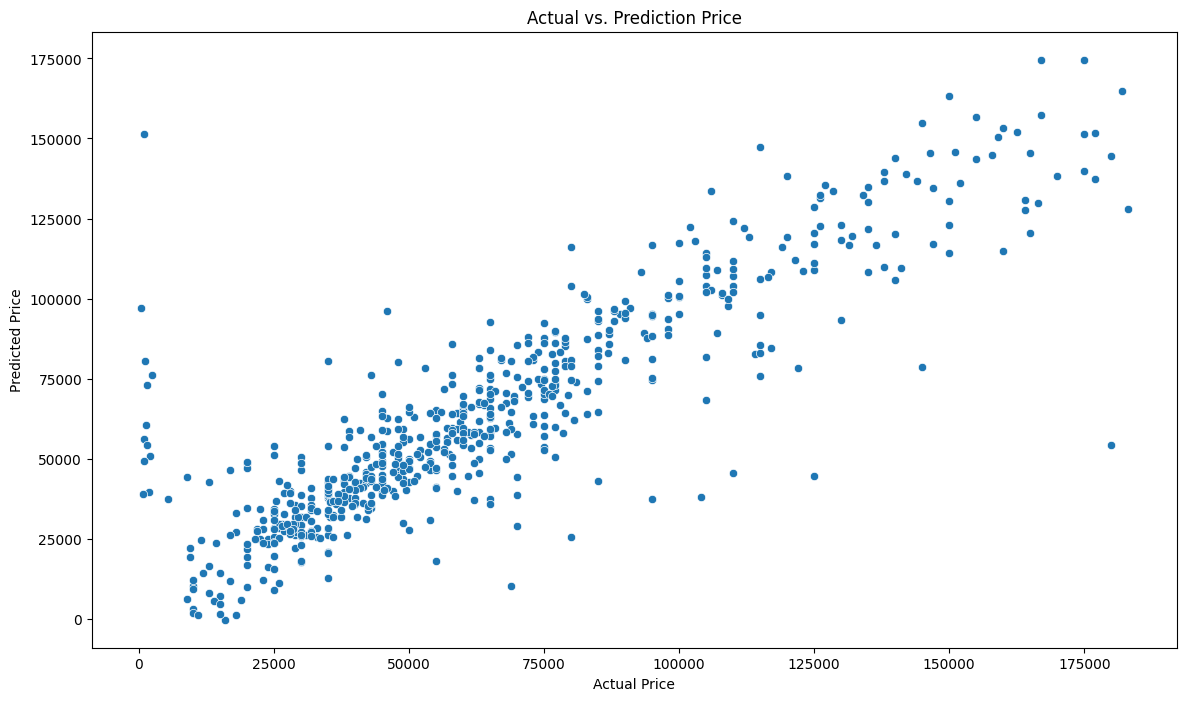

In [413]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction Price',
                                               xlabel='Actual Price',
                                               ylabel='Predicted Price');

 Sebagian besar titik-titik (data) terkonsentrasi di bagian tengah dan bawah grafik (di bawah harga sekitar 100.000), dan titik-titik ini cenderung berada dekat dengan garis diagonal ideal (yaitu, di mana Harga Aktual = Harga Prediksi).

**Feature Importances**

Untuk dapat mengetahui sebenarnya fitur apa saja yang sangat memengaruhi target (price), kita dapat mengeceknya melalui function feature_importances_.

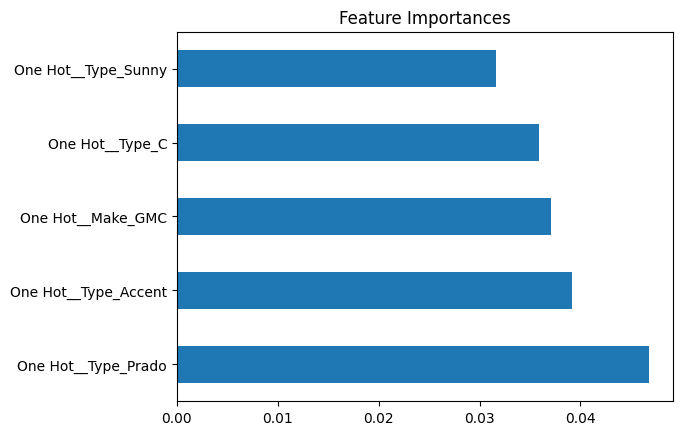

In [418]:
# Plot feature importances
feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending = False).head()
feature_imp.plot(kind='barh', title='Feature Importances');

# **Conslusion**

Model Terbaik: Secara absolut, XGBoost menunjukkan error terkecil dengan MAE 11.416 dan RMSE 18.483. Ini berarti prediksi harga XGBoost meleset rata-rata sekitar 11.416 dari harga aktual, menunjukkan error yang paling konsisten di antara semua model.

Kelemahan Mayor (MAPE Tinggi): Meskipun model berkorelasi positif dengan harga aktual (Actual vs. Predicted Price scatter plot menunjukkan pola diagonal), nilai Mean Absolute Percentage Error (MAPE) yang mencapai 1.30−1.31 (atau 130%−131%) adalah kelemahan utama. Nilai MAPE setinggi ini mengindikasikan bahwa model memiliki akurasi persentase yang rendah dan prediksi harga masih sangat jauh dari harga pasar yang sebenarnya.

Fokus Tuning: Untuk meningkatkan akurasi secara drastis dan menurunkan MAPE, fokus utama selanjutnya haruslah pada Hyperparameter Tuning intensif (menggunakan RandomizedSearchCV atau GridSearchCV) pada model XGBoost dan Random Forest.

# **Recommendations**

1. **Strategi Utama:** Optimasi Model (Hyperparameter Tuning)
Tujuan utama saat ini adalah menurunkan MAPE (yang 130%) dengan mengoptimalkan model XGBoost dan Random Forest. Metode terbaik adalah Randomized Search atau Grid Search pada hyperparameter model.
*   **Tindakan:**
Gunakan RandomizedSearchCV (lebih cepat untuk mencari area terbaik) diikuti oleh GridSearchCV (lebih teliti di sekitar area terbaik yang ditemukan) untuk menemukan kombinasi parameter yang menghasilkan MAPE terendah pada hyperparameter model.

2. **Validasi dan Implementasi:** A/B Testing (Simulasi)
A/B testing pada model Machine Learning biasanya melibatkan pengujian performa model baru di lingkungan produksi. Karena Anda berada dalam tahap modeling data mobil bekas, Anda dapat mensimulasikan A/B Testing dengan membandingkan model Anda saat ini dengan model baru yang sudah di-tuning.

3. **Peningkatan Data**(Feature Engineering Lanjutan)
Grafik scatter plot menunjukkan model kesulitan memprediksi harga mobil mahal. Lakukan rekayasa fitur untuk membantu model memahami fitur non-linear:

# **Save Model**

In [422]:
# Save model
import pickle

estimator = Pipeline([
    ('preprocess', transformer),
    ('model', XGBRegressor())
])

# Latih dulu model
estimator.fit(x_train, y_train)

# Simpan model
pickle.dump(estimator, open('Model_UsedCars_XGB.sav', 'wb'))

In [423]:
# Load model
filename = 'Model_UsedCars_XGB.sav'
loaded_model = pickle.load(open(filename, 'rb'))

# Contoh prediksi
y_pred = loaded_model.predict(X_test)

In [428]:
np.sqrt(mean_squared_error(y_test, loaded_model.predict(x_test)))

np.float64(18483.661109206692)